# Brain Stroke Prediction

This is basically a classification problem. The aim of this study is to check how well it can be predicted if patient will have barin stroke based on the available health data such as glucose level, age, gender etc.

We'll check the data and perform some explanotary data analysis first, then process the data as needed. After preparing the data, we'll evaluate the performance of different algorithms and tune the hyperparameters of the one which is the most promissing. Finally we'll perform a prediction on the test data to check the overall performance of the chosen algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid')

In [2]:
df = pd.read_csv('Data/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Description 

1. gender: "Male", "Female" or "Other"
2. age: age of the patient
3. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4. heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5. evermarried: "No" or "Yes"
6. worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
7. Residencetype: "Rural" or "Urban"
8. avgglucoselevel: average glucose level in blood
9. bmi: body mass index
10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11. stroke: Target. 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

[Kaggle URL](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset) of the dataset.

## Exploratory Data Analysis

In [3]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


🔎 **Observations:**
1. Most of the patients are females.
2. Most of the people are private sector employees.
3. Most people live in Urban area.
4. Average glucose level varies from 55 to 271 with mean value of 105. Since the 50th percentile is 91 this feature has left skewed distribution.
5. Most people has no smoking history.
6. Body mass index feature varies from 14 to 48 with mean value of 6.

In [4]:
# Checking the data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


🔎 **Observations:** hypertension, heart_disease and stroke should be `object` not `int64`

In [5]:
# Updating the data type of the above mentioned features
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(3), object(8)
memory usage: 428.2+ KB


In [6]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.0,4981.0,4981,4981,4981,4981.000000,4981.000000,4981,4981.0
unique,2,NaN,2.0,2.0,2,4,2,NaN,NaN,4,2.0
top,Female,NaN,0.0,0.0,Yes,Private,Urban,NaN,NaN,never smoked,0.0
freq,2907,NaN,4502.0,4706.0,3280,2860,2532,NaN,NaN,1838,4733.0
mean,NaN,43.419859,NaN,NaN,NaN,NaN,NaN,105.943562,28.498173,NaN,NaN
std,NaN,22.662755,NaN,NaN,NaN,NaN,NaN,45.075373,6.790464,NaN,NaN
min,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,14.000000,NaN,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,77.230000,23.700000,NaN,NaN
50%,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,91.850000,28.100000,NaN,NaN
75%,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,113.860000,32.600000,NaN,NaN


🔎 **Observations:** Majority of the data subject don't show any kind of hyper tension, heart disease and stroke history.

In [7]:
def plot_cat_features(df):
  fig, ax = plt.subplots(2, 3, figsize=(18,12))

  sb.countplot(x='stroke', data=df, hue='gender', ax=ax[0,0])
  sb.countplot(x='stroke', data=df, hue='hypertension', ax=ax[0,1])
  sb.countplot(x='stroke', data=df, hue='heart_disease', ax=ax[0,2])
  sb.countplot(x='stroke', data=df, hue='ever_married', ax=ax[1,0])
  sb.countplot(x='stroke', data=df, hue='work_type', ax=ax[1,1])
  sb.countplot(x='stroke', data=df, hue='smoking_status', ax=ax[1,2])

  fig.suptitle('Bar graph showing the number of people who had or not Stroke', y=0.93, fontsize=22)

  plt.show()

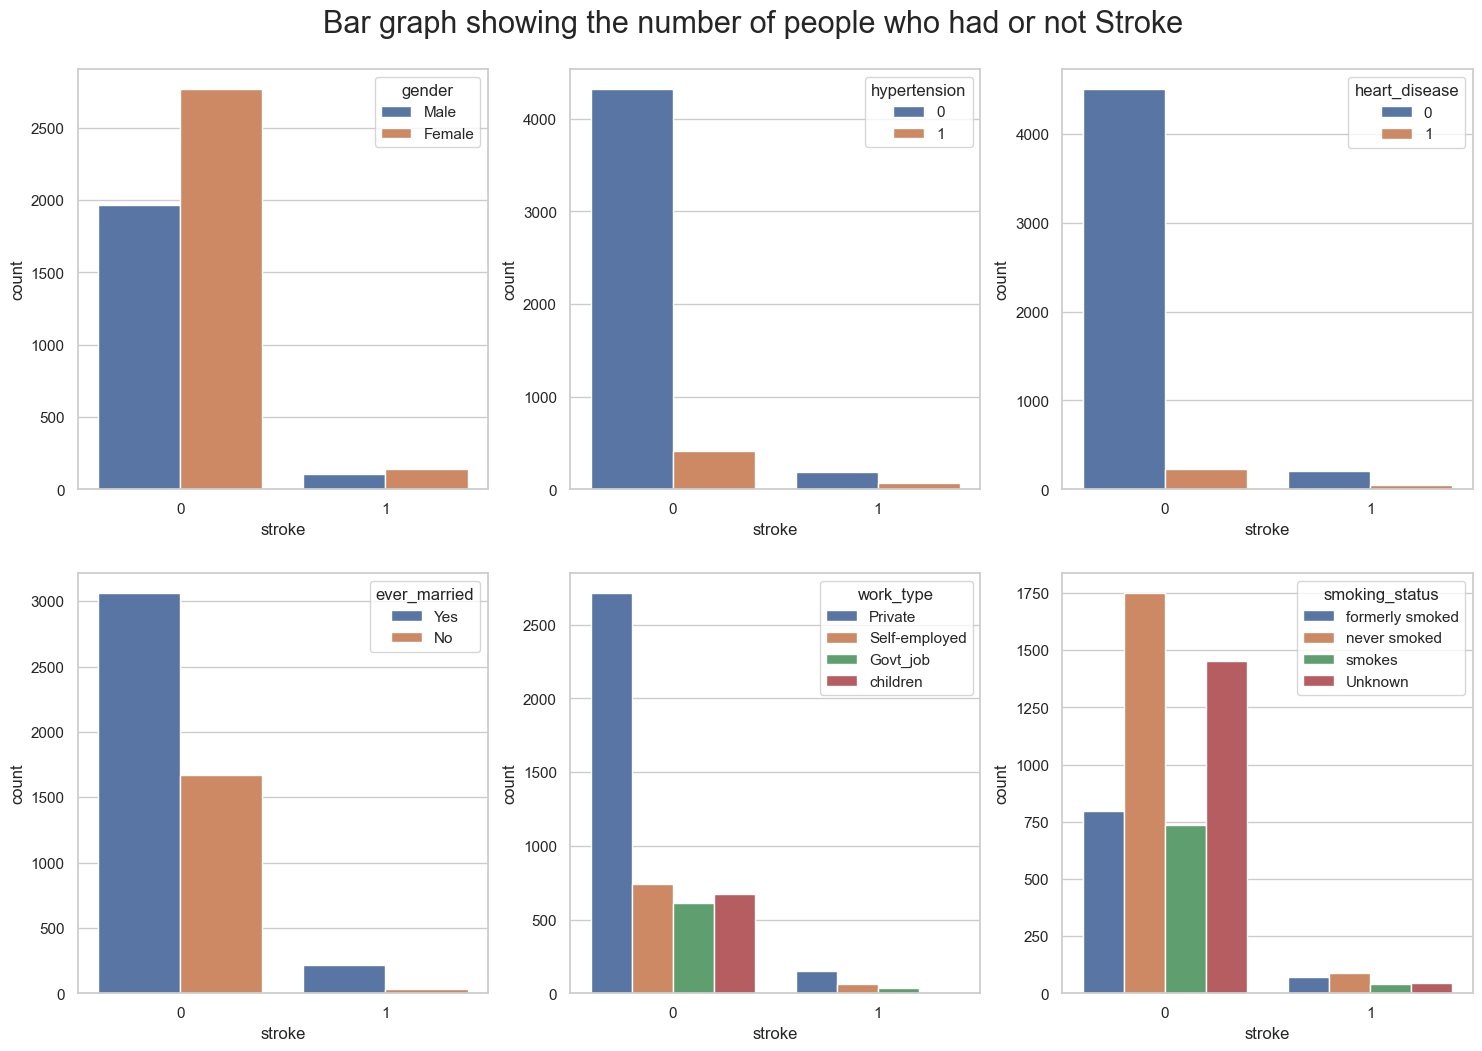

In [8]:
plot_cat_features(df)

🔎 **Observations:** It's hard to notice any kind of relation between the target variable and any of the categorical features. 

In [9]:
def plot_nmr_features(df):
  fig, ax = plt.subplots(3, 2, figsize=(12, 18))

  sb.histplot(df['age'], label='Skewness: %.2f'%(df['age'].skew()), ax=ax[0,0], kde=True)
  ax[0,0].legend(loc='best')
  sb.boxplot(df['age'], ax=ax[0,1])
  sb.histplot(df['avg_glucose_level'], label='Skewness: %.2f'%df['avg_glucose_level'].skew(), ax=ax[1,0], kde=True)
  ax[1,0].legend(loc='best')
  sb.boxplot(df['avg_glucose_level'], ax=ax[1,1])
  sb.histplot(df['bmi'], label='Skewness: %.2f'%df['bmi'].skew(), ax=ax[2,0], kde=True)
  ax[2,0].legend(loc='best')
  sb.boxplot(df['bmi'], ax=ax[2,1])

  fig.suptitle('Distribution of numerical features', y=0.93, fontsize=22)
  plt.show()

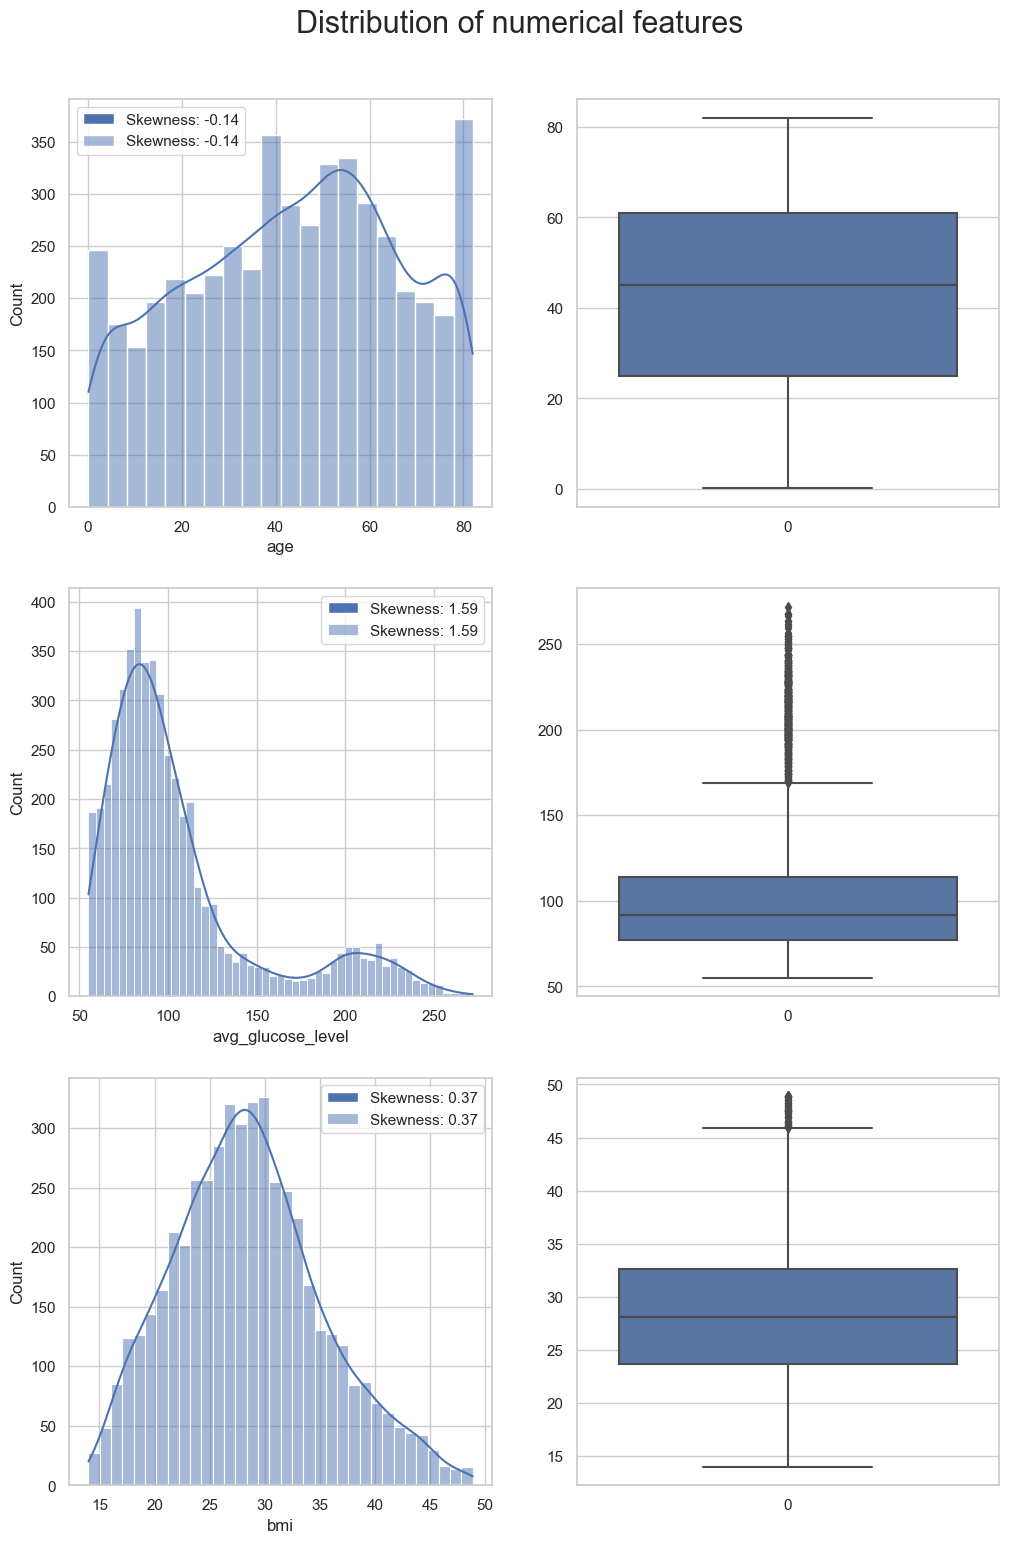

In [10]:
plot_nmr_features(df)

🔎 **Observations:**
1. Age feature has almost unified distribution.
2. Average glucose level has left skewed distribution as indicated previously. However it can be alos consider almost bi-model.
3. BMI has almost normal distribution.
4. Since the magnitude of these numeric values are different scaling might be usefull depending on the machine learning algorithm. 

0    4733
1     248
Name: stroke, dtype: int64

Ratio of the people who had no stroke: 95.02%
Ratio of the people who had stroke: 4.98%


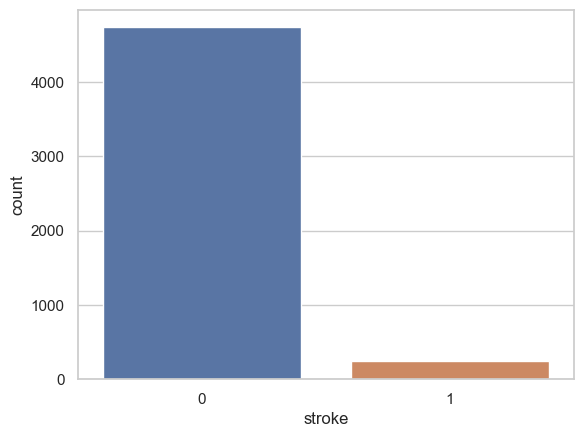

In [11]:
print(df['stroke'].value_counts())

no_stroke = (df['stroke'].value_counts()[0] / len(df['stroke'])) * 100
had_stroke = (df['stroke'].value_counts()[1] / len(df['stroke'])) * 100
print('\nRatio of the people who had no stroke: %.2f%%' % no_stroke)
print('Ratio of the people who had stroke: %.2f%%' % had_stroke)
sb.countplot(data=df, x='stroke')
plt.show()

**Observations:** The dataset is in <ins>highly imbalanced</ins> state. One of the classes has only 4% of the entire dataset. Which means that either we should balance it by using some techniques such as under sampling of the majority class or SMOTE etc. or we should take Precision, Recall and F1-Score into considiration rather than accuracy as it might mislead us.

$Accuracy = \frac{True Positives + True Negative}{True Positives + True Negative + False Positive + False Negative}$

Considering that the 96% of the all classes are 0 which means that those people had not any brain stroke. Which also mean that event if we randomly estimate the class as 0 we'll be correct by 96% chances. That's why we also must check Precision, Recall and F1-Score.

*Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives.*

$Precision = \frac{True Positives}{True Positives + False Positives)}$

*Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives.*

$Recall = \frac{True Positives}{(True Positives + False Negatives)}$

*The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time.*

$F-measure = \frac{(2 * Precision * Recall)}{Precision + Recall)}$

For further details please check [this post](https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/).

Considering the problem, false negatives (*predicting someone as won't have stroke but he/she has it*) is far dangerous than false negatives (*predicting someone as he/she will have stroke but he/she hasn't it*) it's better to try to maximize the **Recall**

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_19863/3925518223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True, fmt='.2f')


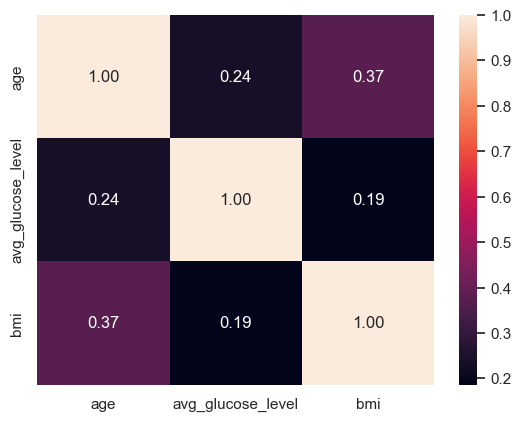

In [12]:
sb.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

🔎 **Observations:** Surprisingly age has a strong correlation with the BMI and not so strong with average glucose level.

# Data Processing
1. Check for null values and handle them
2. Remove outliers if any
3. Handle categorical features
4. Handle imbalanced target values
    1. Random undersampling
    2. Oversampling using SMOTE
5. Scale numeric features

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

🔎 **Observations:** As can be seen on above list that there are no null values within the dataset.

Let's focus on the outliers based on the boxplots above.

In [14]:
df_clean = df.copy()
df_clean = df_clean[(df_clean['avg_glucose_level'] <= 160) & (df['bmi'] <= 45)] # Creating a copy of the original dataset
df_clean = df_clean.reset_index(drop=True)
df_clean.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4295,4295.000000,4295.0,4295.0,4295,4295,4295,4295.000000,4295.000000,4295,4295.0
unique,2,NaN,2.0,2.0,2,4,2,NaN,NaN,4,2.0
top,Female,NaN,0.0,0.0,Yes,Private,Urban,NaN,NaN,never smoked,0.0
freq,2540,NaN,3977.0,4123.0,2692,2446,2172,NaN,NaN,1559,4136.0
mean,NaN,41.104261,NaN,NaN,NaN,NaN,NaN,90.779090,27.793341,NaN,NaN
std,NaN,22.491501,NaN,NaN,NaN,NaN,NaN,21.588537,6.448618,NaN,NaN
min,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,14.000000,NaN,NaN
25%,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,74.995000,23.200000,NaN,NaN
50%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,87.860000,27.600000,NaN,NaN
75%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,103.445000,31.900000,NaN,NaN


In [15]:
print(df_clean['stroke'].value_counts())

no_stroke = (df_clean['stroke'].value_counts()[0] / len(df_clean['stroke'])) * 100
had_stroke = (df_clean['stroke'].value_counts()[1] / len(df_clean['stroke'])) * 100
print('\nRatio of the people who had no stroke: %.2f%%' % no_stroke)
print('Ratio of the people who had stroke: %.2f%%' % had_stroke)

0    4136
1     159
Name: stroke, dtype: int64

Ratio of the people who had no stroke: 96.30%
Ratio of the people who had stroke: 3.70%


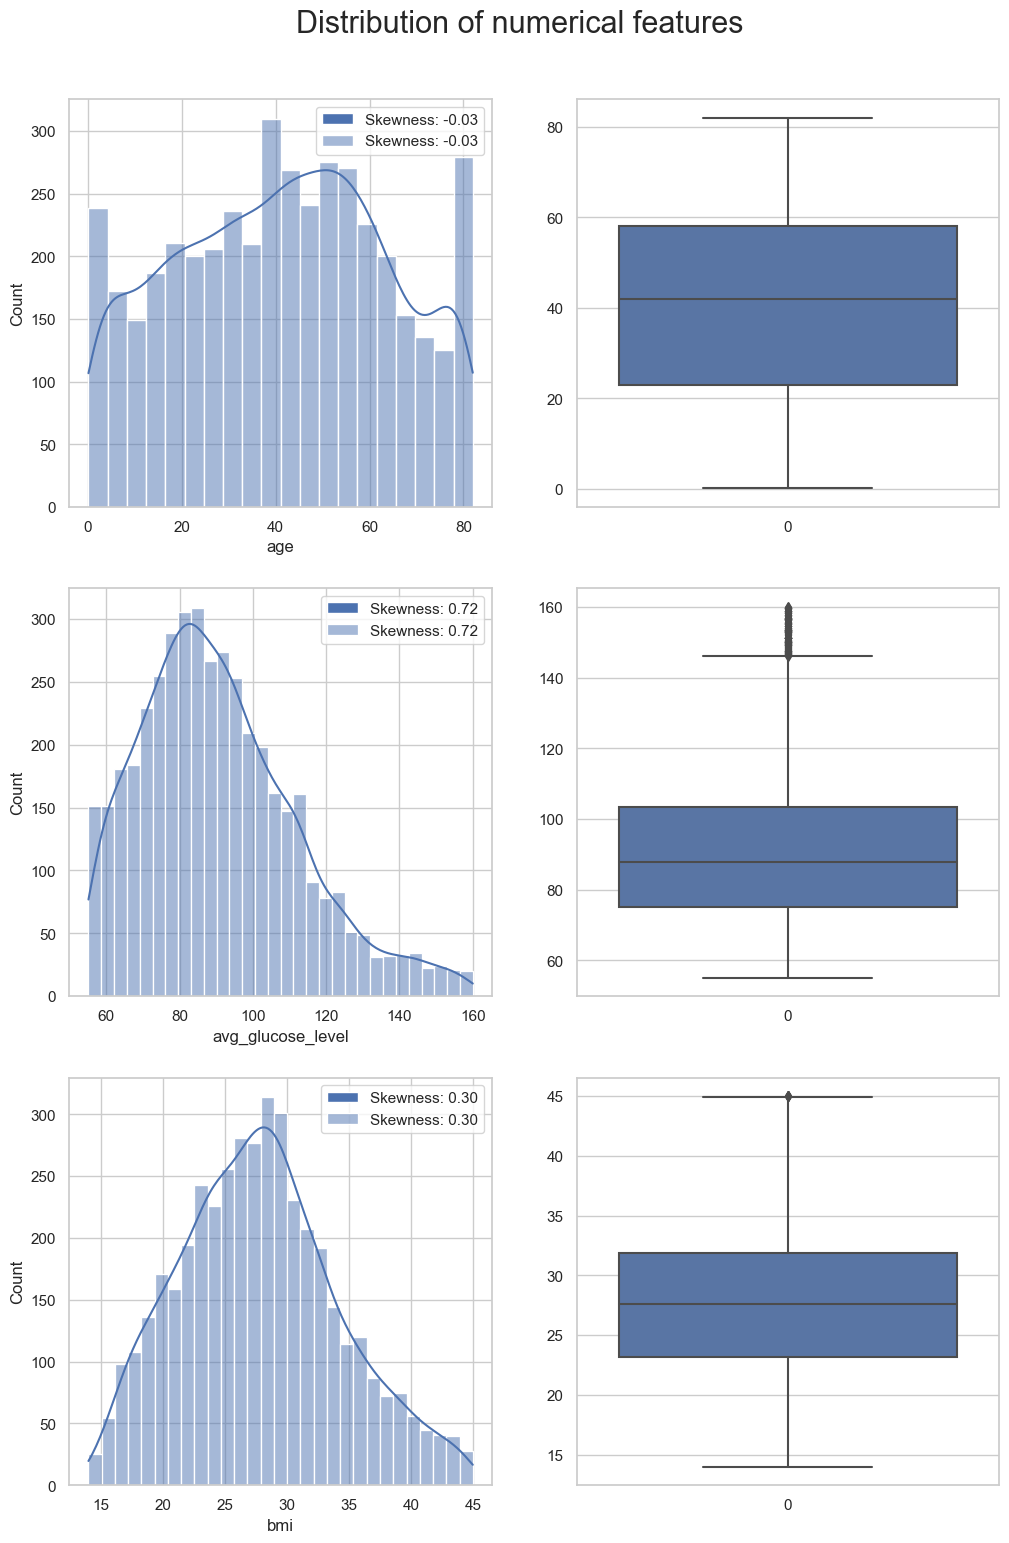

In [16]:
# Checking the impact of outlier removal on numerical features
plot_nmr_features(df_clean)

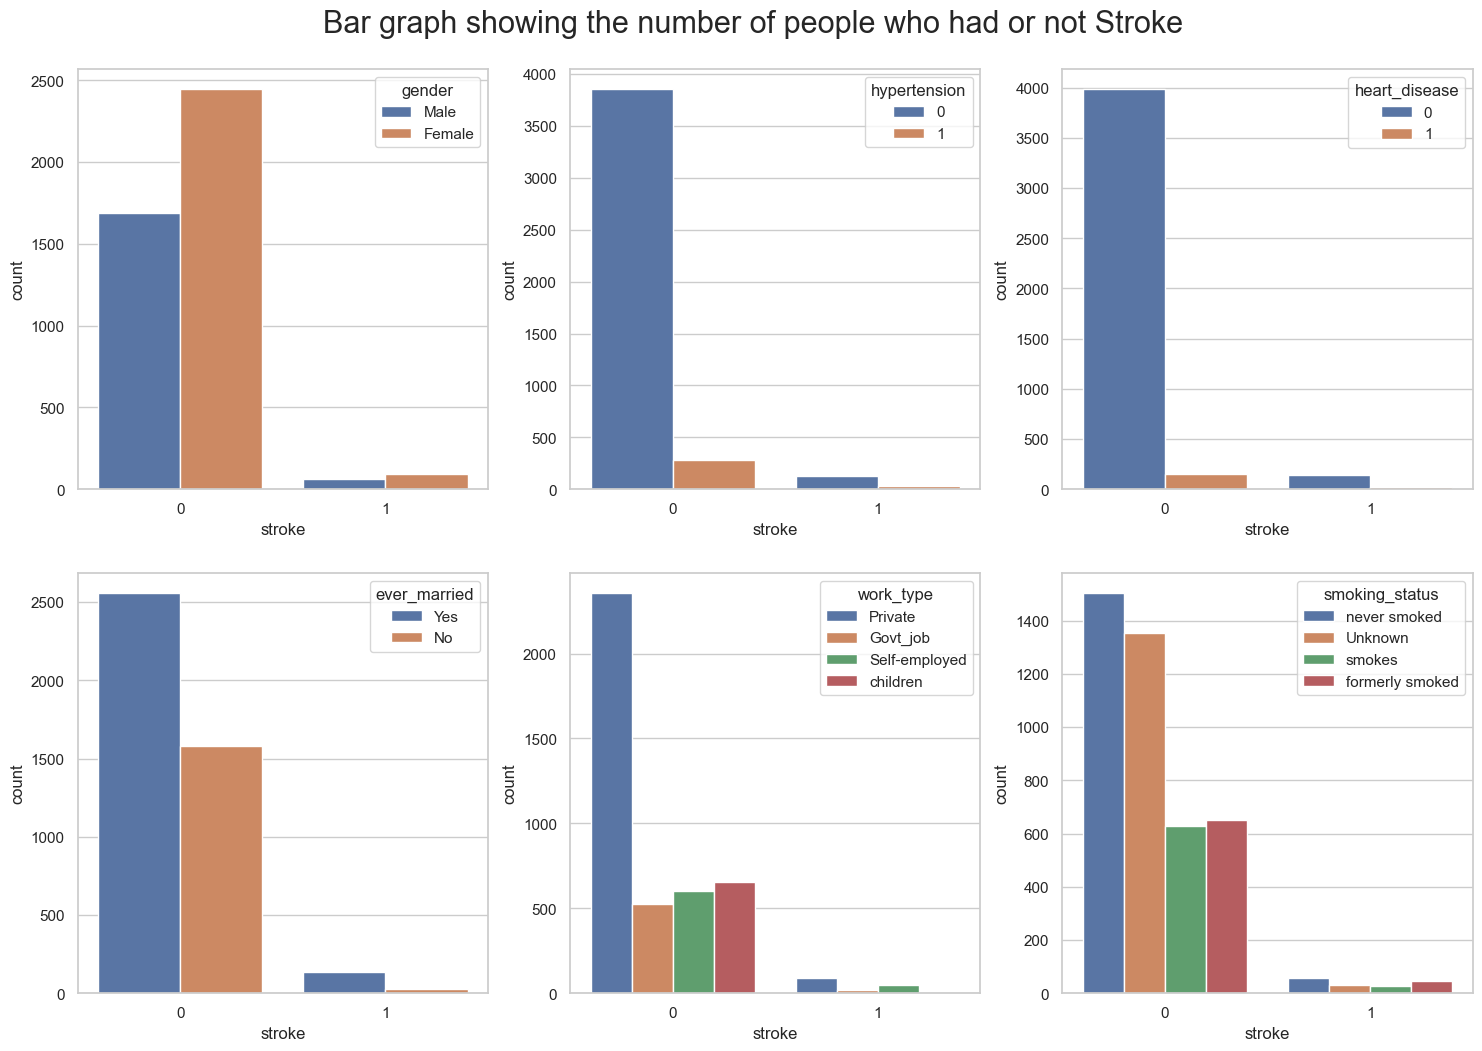

In [17]:
# Checking the impact of outlier removal on categorical features
plot_cat_features(df_clean)

🔎 **Observations:** The ratio of the records with stroke to the non-stroke ones has decreases which shows that we'll less data to generalize. It's better to continue without removing the outliers at the begining and decide based on the performance of the algorihtms to use the dataset w/o outliers.

In [18]:
# List of the all features
features = df.drop('stroke', axis=1).columns
features

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [19]:
cat_features = [] # List of categorical features
nmr_features = [] # List of numerical features

for i in range(len(features)):
  if df.iloc[:, i].dtype == 'object':
     cat_features.append(df.columns[i])
  else:
    nmr_features.append(df.columns[i])

print('Categorical Features:', cat_features)
print('Numerical Features:', nmr_features)

Categorical Features: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical Features: ['age', 'avg_glucose_level', 'bmi']


In [20]:
# Handle categorical features
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df.head()

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_19863/2042952085.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=cat_features, drop_first=True)


,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,0,1,1,1,0,0,1,1,0,0
1,80.0,105.92,32.5,1,1,0,1,1,1,0,0,0,0,1,0
2,49.0,171.23,34.4,1,0,0,0,1,1,0,0,1,0,0,1
3,79.0,174.12,24.0,1,0,1,0,1,0,1,0,0,0,1,0
4,81.0,186.21,29.0,1,1,0,0,1,1,0,0,1,1,0,0


In [21]:
x = df.drop('stroke', axis=1)
y = df['stroke'].astype('int')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(x)

# Modelling 

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Non-linear Models from Scikit-Learn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Linear Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold # For imbalanced datasets
from sklearn.model_selection import KFold           # For balanced datasets
from sklearn.model_selection import cross_validate

### Model Selection

In [25]:
def model_evaluation(x, y):
    models = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    models.append(('SVC', SVC()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('GNB', GaussianNB()))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('LR', LogisticRegression()))
    models.append(('ABC', AdaBoostClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))

    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = []
    results_pre = []
    results_rec = []
    results_f1 = []
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Accuracy
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()

        # Precision
        pre_mean = result['test_precision'].mean()
        pre_std = result['test_precision'].std()

        # Recall
        rec_mean = result['test_recall'].mean()
        rec_std = result['test_recall'].std()

        #F1-Score
        f1_mean = result['test_f1'].mean()
        f1_std = result['test_f1'].std()

        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std, 'Pre Mean': pre_mean, 
                         'Pre STD': pre_std, 'Rec Mean': rec_mean, 'Rec STD': rec_std, 'F1 Mean': f1_mean, 
                         'F1 STD': f1_std}
        
        df_results = df_results.append(df_result_row, ignore_index=True)
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names, rotation=30)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names, rotation=30)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names, rotation=30)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names, rotation=30)

    plt.show()


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.950    0.001     0.000    0.000     0.000    0.000    0.000   
DTC           0.908    0.011     0.143    0.043     0.173    0.078    0.154   
KNN           0.947    0.003     0.242    0.212     0.032    0.030    0.056   
LDA           0.946    0.004     0.292    0.206     0.060    0.048    0.099   
GNB           0.823    0.017     0.149    0.036     0.545    0.138    0.234   
RFC           0.947    0.003     0.033    0.100     0.004    0.012    0.007   
LR            0.950    0.001     0.100    0.300     0.004    0.012    0.008   
ABC           0.949    0.002     0.083    0.171     0.008    0.016    0.015   
GBC           0.948    0.002     0.070    0.155     0.008    0.016    0.014   

           F1 STD  
Algorithm          
SVC         0.000  
DTC         0.054  
KNN         0.052  
LDA         0.077  
GNB       

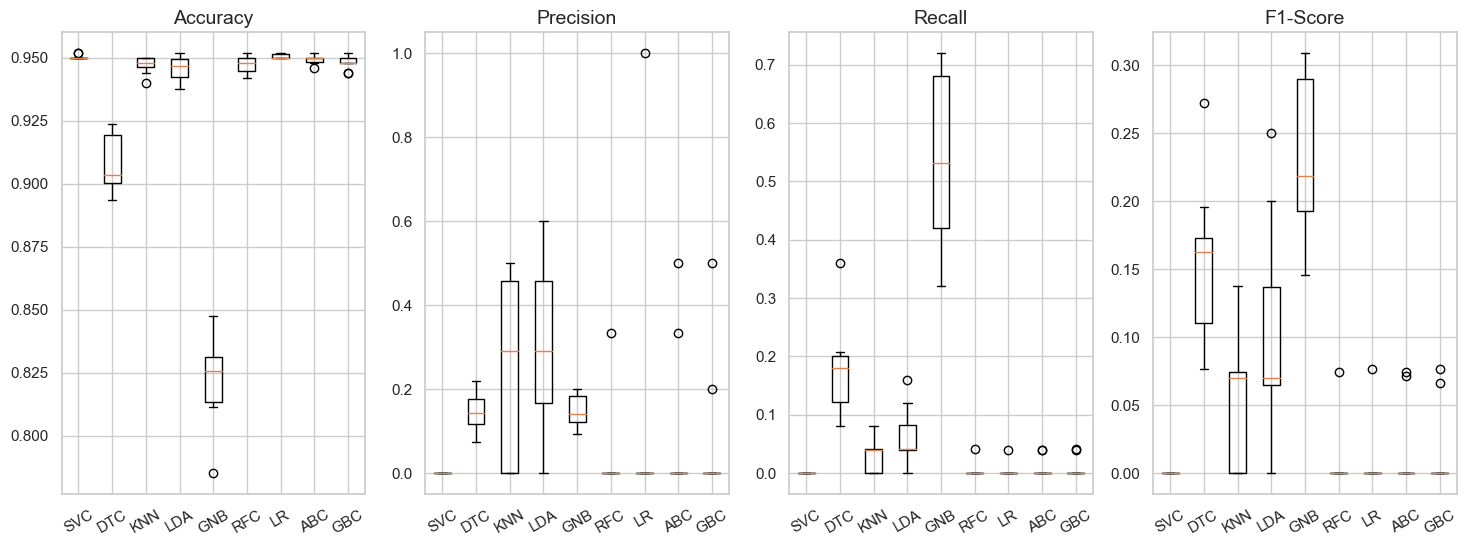

In [26]:
model_evaluation(x_std, y)

🔎 **Observations:** Gaussian Naive Bayes has the best Recall performance among the others. However, the score is no better than an educated guess. That's why we need to find a way to improve the performance. First, let's remove the outliers and try again.

In [27]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
1,Male,74.000,1,1,Yes,Private,Rural,70.090,27.400,never smoked,1
2,Female,69.000,0,0,No,Private,Urban,94.390,22.800,never smoked,1
3,Female,78.000,0,0,Yes,Private,Urban,58.570,24.200,Unknown,1
4,Female,81.000,1,0,Yes,Private,Rural,80.430,29.700,never smoked,1


In [28]:
df_clean = pd.get_dummies(data=df_clean, columns=cat_features, drop_first=True)
x = df_clean.drop('stroke', axis=1)
y = df_clean['stroke'].astype('int')

std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(x)
x.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.000,105.920,32.500,1,0,1,1,1,0,0,0,0,1,0
1,74.000,70.090,27.400,1,1,1,1,1,0,0,0,0,1,0
2,69.000,94.390,22.800,0,0,0,0,1,0,0,1,0,1,0
3,78.000,58.570,24.200,0,0,0,1,1,0,0,1,0,0,0
4,81.000,80.430,29.700,0,1,0,1,1,0,0,0,0,1,0


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.963    0.001     0.000    0.000     0.000    0.000    0.000   
DTC           0.923    0.012     0.100    0.069     0.126    0.080    0.110   
KNN           0.962    0.003     0.100    0.300     0.006    0.019    0.012   
LDA           0.960    0.003     0.200    0.208     0.038    0.042    0.063   
GNB           0.861    0.012     0.114    0.019     0.403    0.057    0.177   
RFC           0.962    0.001     0.000    0.000     0.000    0.000    0.000   
LR            0.963    0.001     0.000    0.000     0.000    0.000    0.000   
ABC           0.962    0.002     0.000    0.000     0.000    0.000    0.000   
GBC           0.961    0.003     0.075    0.160     0.013    0.025    0.021   

           F1 STD  
Algorithm          
SVC         0.000  
DTC         0.068  
KNN         0.035  
LDA         0.068  
GNB       

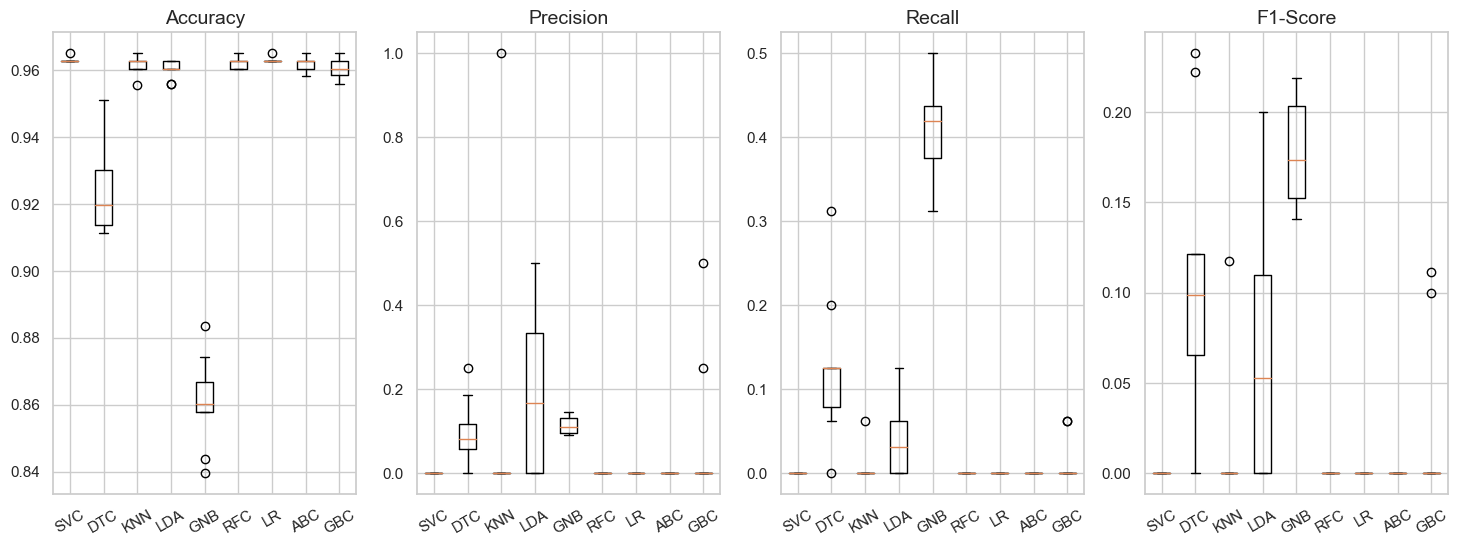

In [29]:
model_evaluation(x_std, y)

🔎 **Observations:** As we assumed earlier, removing data points from the dataset has reduced the generalization ability of the algorithms. Now we have worse performance than the previous one.

We'll first try undersampling and check the performance of different algorithms, then we'll do the same thing for the over sampled dataset. We'll use the one dataset with the outliers.

In [30]:
# Randomly delete examples in the majority class using RandomUnderSampler package.
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5) # Number of the items in the minority class will be 50% of the majority class

x = df.drop('stroke', axis=1)
y = df['stroke'].astype('int')

std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(x)

x_under, y_under = undersample.fit_resample(x_std, y)
print('x under sampled shape: ', x_under.shape)
print('y under sampled shape: ', y_under.shape)

x under sampled shape:  (744, 14)
y under sampled shape:  (744,)


In [31]:
# Check the ratio of classes after undersampling
pd.DataFrame(y_under).value_counts()

stroke
0         496
1         248
dtype: int64

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.773    0.044     0.676    0.086     0.629    0.073    0.649   
DTC           0.688    0.063     0.545    0.108     0.532    0.098    0.532   
KNN           0.738    0.031     0.646    0.070     0.471    0.094    0.541   
LDA           0.776    0.063     0.672    0.103     0.665    0.104    0.664   
GNB           0.729    0.041     0.569    0.050     0.777    0.091    0.655   
RFC           0.776    0.060     0.675    0.100     0.632    0.134    0.648   
LR            0.776    0.059     0.677    0.104     0.648    0.099    0.658   
ABC           0.760    0.043     0.646    0.067     0.617    0.103    0.628   
GBC           0.765    0.046     0.664    0.077     0.596    0.095    0.626   

           F1 STD  
Algorithm          
SVC         0.065  
DTC         0.083  
KNN         0.076  
LDA         0.088  
GNB       

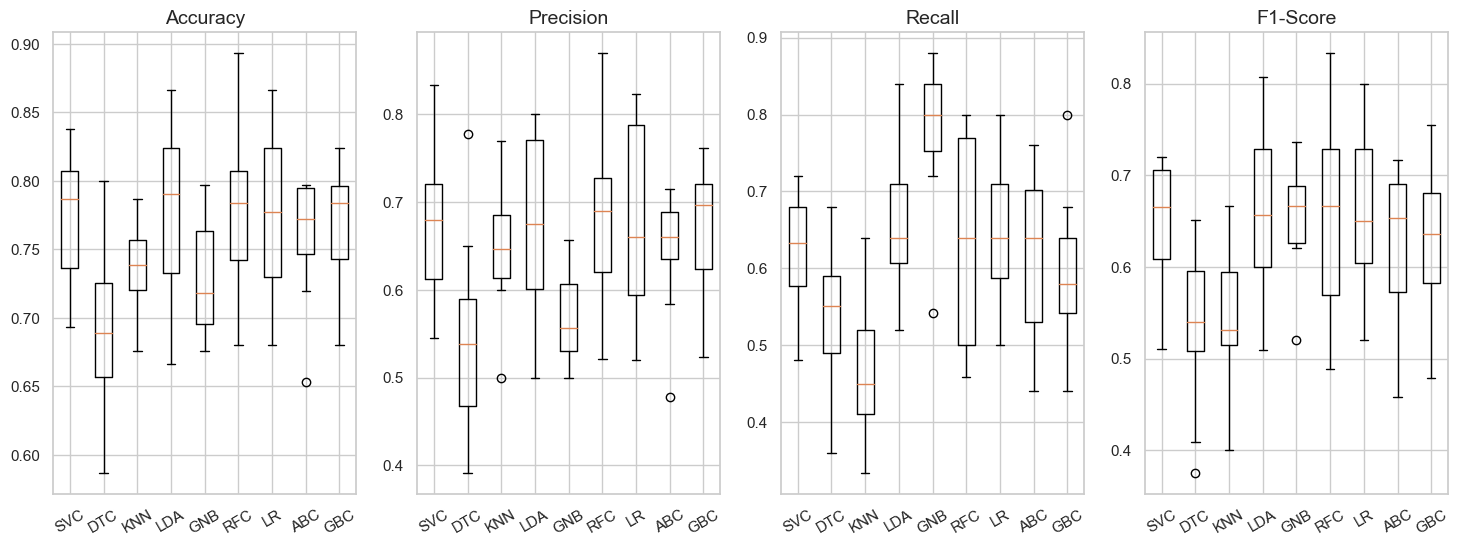

In [32]:
model_evaluation(x_under, y_under)

🔎 **Observations:** It seems that randomly deleting the data points to bring the dataset to a balanced state worked well. Now we have almost 0.8 Recall score which was provided by Gaussian Naive Bayes. It's a good candidate to focus on hyperparameter tuning. However, it's better to check if we can achive better results with oversampling first. We'll apply Synthetic Minority Oversampling Technique (SMOTE). *SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.* For further details please check [this article](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
oversampling = SMOTE(sampling_strategy=0.5)
x_over, y_over = oversampling.fit_resample(x_std, y)
print('x over sampled shape: ', x_over.shape)
print('y over sampled shape: ', y_over.shape)
# Check the ratio of classes after over sampling
print(pd.DataFrame(y_over).value_counts())

x over sampled shape:  (7099, 14)
y over sampled shape:  (7099,)
stroke
0         4733
1         2366
dtype: int64


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.866    0.009     0.777    0.012     0.841    0.026    0.808   
DTC           0.890    0.016     0.831    0.031     0.844    0.027    0.837   
KNN           0.893    0.010     0.779    0.018     0.949    0.013    0.855   
LDA           0.783    0.015     0.667    0.025     0.698    0.033    0.682   
GNB           0.720    0.021     0.550    0.022     0.877    0.021    0.676   
RFC           0.942    0.007     0.919    0.013     0.905    0.017    0.912   
LR            0.780    0.016     0.670    0.029     0.670    0.030    0.670   
ABC           0.843    0.006     0.761    0.018     0.772    0.017    0.766   
GBC           0.896    0.007     0.872    0.020     0.808    0.019    0.838   

           F1 STD  
Algorithm          
SVC         0.015  
DTC         0.023  
KNN         0.013  
LDA         0.022  
GNB       

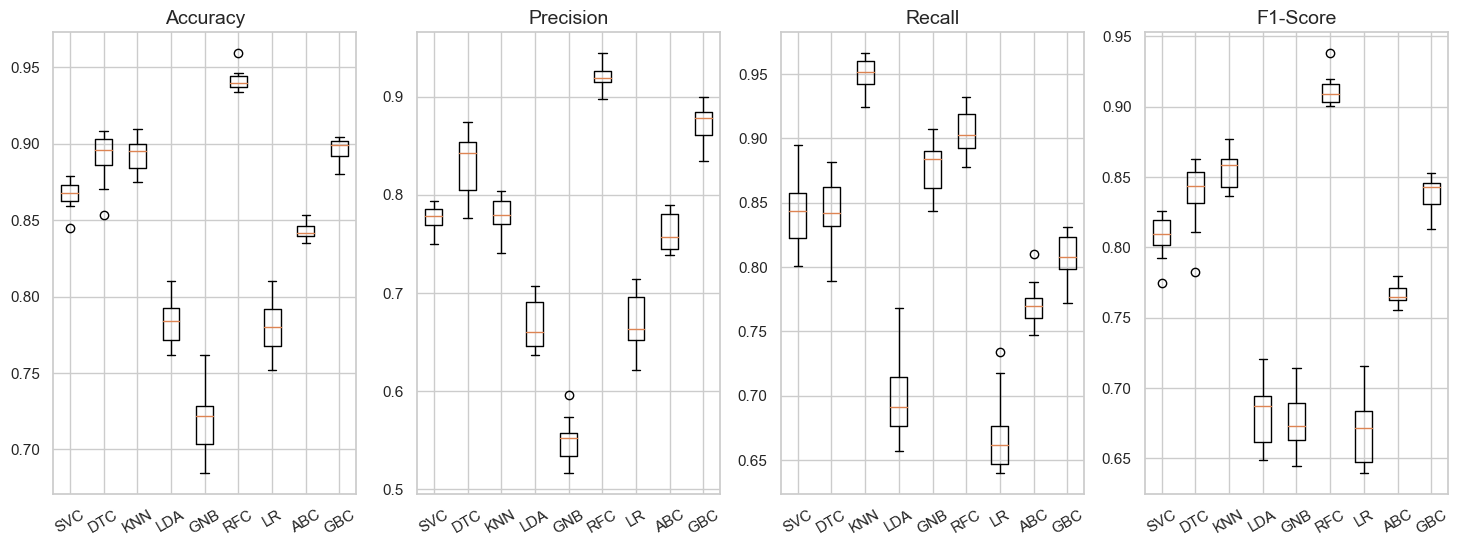

In [35]:
model_evaluation(x_over, y_over)

🔎 **Observation:** KNN provided the best Recall so far with SMOTE. However, considering that we used *k nearest minority class neighbors* to synthetically generate data points, it seems reasonable. That's why it's hard to rely on this model for real-world implementation. Also adding more data points increased the model evaluation time dramatically which is worth to mention at this point.

We'll continue with the GNB with under-sampled dataset for hyperparameter tuning.

## Hyperparameter Tuning for GNB

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, shuffle=True, random_state=101)

In [38]:
h_parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

model = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
grid = GridSearchCV(estimator=model, param_grid=h_parameters, cv=kfold)

# Scale the train and test sets separately not to cause and data leakage
std_scaler = StandardScaler()
x_train_std = std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

grid.fit(x_train, y_train)

print('Best score:', grid.best_score_)
print('Best parameters: ', grid.best_params_)

Best score: 0.761344537815126
Best parameters:  {'var_smoothing': 0.2848035868435802}


### Model Training

In [39]:
model = GaussianNB(**grid.best_params_)
model.fit(x_train, y_train)

GaussianNB(var_smoothing=0.2848035868435802)

In [40]:
y_hat = model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy score: %.1f%%" % (accuracy_score(y_test, y_hat)*100))
print('Precision score: %.3f' % precision_score(y_test, y_hat))
print('Recall: %.3f' % recall_score(y_test, y_hat))
print('F1-Score: %.3f' % f1_score(y_test, y_hat))

Accuracy score: 78.5%
Precision score: 0.654
Recall: 0.708
F1-Score: 0.680


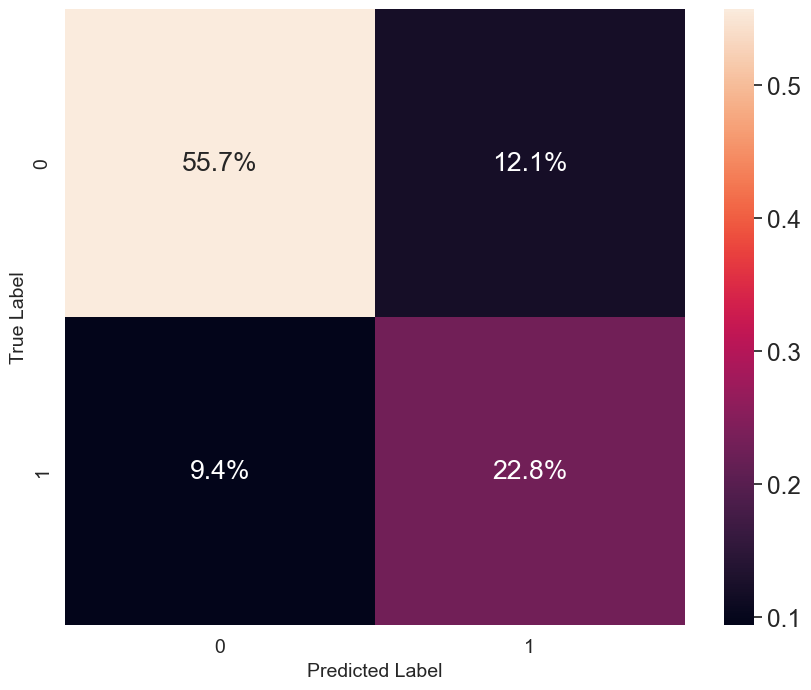

In [42]:
cf_matrix = confusion_matrix(y_test, y_hat)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Results

We've tried 9 different algorithms with and without outliers. It turned out that performance of the algorithms were better with the outliers as that dataset had more data points. We used the same dataset to bring to a balanced state by using Random Under Sampler and SMOTE. The dataset with synthetically generated datapints produced great results however, since it uses a similar algorithm with the KNN we decided not to count on the score of this model. Instead, we decided to move forward with the under-sampled dataset. After the hyperparamter tuning, the model with Gaussian Naive Bayes algorithm achieved 0.77 recall score which is better than the original value. 

## Future Work
There are still some room for the improvement. We can enrich the dataset by collecting some other data points from other patients or adding extra feature such as weekly alcohol consumption, stroke history in the family, diet habits etc. Apart from enriching the dataset, we can also utilize the other algorithms such as XGBoosting.

---

In [43]:
type(pd.Series.to_numpy(y_under))

numpy.ndarray

In [44]:
y_under.shape

(744,)

In [45]:
# Export under sampled dataset to .csv file for future usage
df_under = pd.DataFrame(data=x_under, columns=[f'feature_{i}' for i in range(x_under.shape[1])])
df_under['target'] = y_under
df_under.to_csv('Data/Processed/under_sampled.csv', header=False, index=False)
df_under.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,target
0,0.070,-0.649,0.928,-0.845,-0.326,-0.242,0.720,0.861,-0.439,-0.395,-1.017,-0.459,-0.765,2.328,0
1,1.129,-0.797,1.105,-0.845,-0.326,-0.242,0.720,-1.161,2.279,-0.395,0.983,-0.459,1.308,-0.430,0
2,0.996,-1.043,-0.574,-0.845,-0.326,-0.242,0.720,-1.161,2.279,-0.395,0.983,-0.459,1.308,-0.430,0
3,-0.416,-0.361,-0.780,1.184,-0.326,-0.242,-1.389,0.861,-0.439,-0.395,-1.017,-0.459,-0.765,2.328,0
4,-1.122,-0.175,-0.662,1.184,-0.326,-0.242,-1.389,0.861,-0.439,-0.395,-1.017,-0.459,1.308,-0.430,0


In [46]:
# Save the model
import joblib

joblib.dump(model, 'Models/trained_model.joblib')

['Models/trained_model.joblib']

In [47]:
# Saving the scaler 
joblib.dump(std_scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']